# Ещё одно бесполезное исследование ковидлы 
# Another one useless COVID Research

Я решил вспомнить, как анализировать данные в Python.

Статистика COVID-19, пожалуй, самая хайповая тема последних тема последних полутора лет, поэтому решил исследовать её.

Все подписи к данному исследованию продублированы на английском, так как мой круг общения не ограничивается только странами бСССР.

---------------------

By some reasons I've decided to remember how to analyze data via Python.

COVID-19-related statistics is one of the most highligthed for last 1,5 years. That's why I've decided to took this topic.

All labels and comments to this little reseacrh are translated to English language, because my circle isn't limited by ex-USSR countries.

Данные для исследования собраны из открытых источников. 

Основной источник данных - Our World in Data. Они, в свою очередь, опираются на данные Университета Хопкинса. 

Дата актуальности данных - 19 января 2022 года.

---------------------

This research is based on open data. 

The main source of data is Our World in Data, which is based on data of Johns Hopkins University. 

Actual date at the momemt of research - 19 January 2022.

Начну с импорта ключевых библиотек для анализа данных в Python и подтягивания основных данных. Также в процессе буду удалять ненужные нам столбцы.

---------------------

I will begin from importing essential data analysis libraries and to load the main massive of data. I will drop unneccessary data columns in the process.

Добавить данные по избыточной смертности
https://github.com/owid/covid-19-data/blob/master/public/data/excess_mortality/excess_mortality.csv

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 20)

In [2]:
master_data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv')

In [3]:
master_data

iso_code continent           location last_updated_date  total_cases  \
0         AFG      Asia        Afghanistan        2022-01-19     159070.0   
1    OWID_AFR       NaN             Africa        2022-01-19   10436374.0   
2         ALB    Europe            Albania        2022-01-19     239129.0   
3         DZA    Africa            Algeria        2022-01-19     228918.0   
4         AND    Europe            Andorra        2022-01-19      29888.0   
..        ...       ...                ...               ...          ...   
227       WLF   Oceania  Wallis and Futuna        2022-01-19        454.0   
228  OWID_WRL       NaN              World        2022-01-19  339297713.0   
229       YEM      Asia              Yemen        2022-01-19      10449.0   
230       ZMB    Africa             Zambia        2022-01-19     299172.0   
231       ZWE    Africa           Zimbabwe        2022-01-19     226887.0   

     new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0         96.0              79.857        7386.0         3.0   
1      35229.0           33372.429      234188.0       230.0   
2       2643.0            2080.000        3283.0         6.0   
3       1359.0             730.286        6443.0         8.0   
4        989.0             497.143         142.0         0.0   
..         ...                 ...           ...         ...   
227        0.0               0.000           7.0         0.0   
228  4231832.0         3095396.429     5565198.0     10412.0   
229       41.0              32.714        1994.0         2.0   
230     1140.0            1393.857        3877.0         4.0   
231      427.0             350.571        5266.0         8.0   

     new_deaths_smoothed  ...  female_smokers  male_smokers  \
0                  1.429  ...             NaN           NaN   
1                321.000  ...             NaN           NaN   
2                  4.286  ...           7.100        51.200   
3                 10.143  ...           0.700        30.400   
4                  0.143  ...          29.000        37.800   
..                   ...  ...             ...           ...   
227                0.000  ...             NaN           NaN   
228             7255.571  ...           6.434        34.635   
229                1.000  ...           7.600        29.200   
230                6.714  ...           3.100        24.700   
231                7.286  ...           1.600        30.700   

     handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                    37.746                       0.500            64.83   
1                       NaN                         NaN              NaN   
2                       NaN                       2.890            78.57   
3                    83.741                       1.900            76.88   
4                       NaN                         NaN            83.73   
..                      ...                         ...              ...   
227                     NaN                         NaN            79.94   
228                  60.130                       2.705            72.58   
229                  49.542                       0.700            66.12   
230                  13.938                       2.000            63.89   
231                  36.791                       1.700            61.49   

     human_development_index  excess_mortality_cumulative_absolute  \
0                      0.511                                   NaN   
1                        NaN                                   NaN   
2                      0.795                                   NaN   
3                      0.748                                   NaN   
4                      0.868                                   NaN   
..                       ...                                   ...   
227                      NaN                                   NaN   
228                    0.737                                   NaN   
229        

Собрав датасет, удаляем из него ненужные признаки.

Так как сравнивать по абсолютному числу заболеваний и смертей условные Россию и Мальту некорректно, анализ будем основывать на удельных показателях на 100, 100 000 и 1 000 000 населения.

----

After gathering dataset I need to delete useless columns.

Comparation of absolute data is incorrect - let me give Russia and Malta as examples. So I will base my analysis on relative values per 100, 100 000 or 1 000 000 population.


In [4]:
master_data1=master_data.drop(['total_boosters', 'total_boosters_per_hundred', 'stringency_index', 'positive_rate',
                               'population', 'population_density', 'gdp_per_capita', 'extreme_poverty', 
                               'cardiovasc_death_rate', 'diabetes_prevalence', 'handwashing_facilities', 'life_expectancy',
                               'female_smokers', 'male_smokers', 'total_vaccinations', 'people_vaccinated',
                               'iso_code', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 
                               'new_deaths_smoothed', 'new_cases_per_million', 'new_deaths_per_million', 'icu_patients', 
                               'hosp_patients', 'weekly_icu_admissions', 'weekly_hosp_admissions', 'new_tests',
                               'total_tests', 'new_tests_per_thousand', 'new_tests_smoothed', 'median_age',
                               'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 
                               'excess_mortality', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                               'new_people_vaccinated_smoothed', 'aged_70_older', 'new_vaccinations', 
                               'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million', 'people_fully_vaccinated'],
                               axis=1)
master_data1=master_data1.drop(226, axis=0)
master_data1=master_data1.loc[master_data1['continent'].notna()==True]
master_data1

continent           location last_updated_date  \
0             Asia        Afghanistan        2022-01-19   
2           Europe            Albania        2022-01-19   
3           Africa            Algeria        2022-01-19   
4           Europe            Andorra        2022-01-19   
5           Africa             Angola        2022-01-19   
..             ...                ...               ...   
225  South America          Venezuela        2022-01-19   
227        Oceania  Wallis and Futuna        2022-01-19   
229           Asia              Yemen        2022-01-19   
230         Africa             Zambia        2022-01-19   
231         Africa           Zimbabwe        2022-01-19   

     total_cases_per_million  new_cases_smoothed_per_million  \
0                   3993.179                           2.005   
2                  83235.118                         723.999   
3                   5130.778                          16.368   
4                 386379.502                        6426.854   
5                   2793.071                          12.091   
..                       ...                             ...   
225                16062.005                          56.382   
227                40923.021                           0.000   
229                  342.695                           1.073   
230                15811.925                          73.669   
231                15033.424                          23.229   

     total_deaths_per_million  new_deaths_smoothed_per_million  \
0                     185.413                            0.036   
2                    1142.734                            1.492   
3                     144.408                            0.227   
4                    1835.716                            1.847   
5                      55.314                            0.147   
..                        ...                              ...   
225                   187.842                            0.109   
227                   630.972                            0.000   
229                    65.397                            0.033   
230                   204.908                            0.355   
231                   348.923                            0.483   

     reproduction_rate  icu_patients_per_million  hosp_patients_per_million  \
0                 1.44                       NaN                        NaN   
2                 1.56                       NaN                        NaN   
3                 1.34                     0.829                        NaN   
4                 1.08                       NaN                        NaN   
5                 0.64                       NaN                        NaN   
..                 ...                       ...                        ...   
225               1.69                       NaN                        NaN   
227                NaN                       NaN                        NaN   
229               1.44                       NaN                        NaN   
230               0.78                       NaN                        NaN   
231               0.49                       NaN                        NaN   

     ...  total_tests_per_thousand  new_tests_smoothed_per_thousand  \
0    ...                       NaN                              NaN   
2    ...                       NaN                              NaN   
3    ...                       NaN                              NaN   
4    ...                  3633.943                           11.027   
5    ...                       NaN                              NaN   
..   ...                       ...                              ...   
225  ...                       NaN                              NaN   
227  ...                       NaN                              NaN   
229  ...                       NaN                              NaN   
230  ...                   164.741                            0.413   
231  ...

In [5]:
master_data1.describe(include='all')

continent location last_updated_date  total_cases_per_million  \
count        218      218               218               214.000000   
unique         6      218                 5                      NaN   
top       Africa    Timor        2022-01-19                      NaN   
freq          55        1               214                      NaN   
mean         NaN      NaN               NaN             82780.315621   
...          ...      ...               ...                      ...   
min          NaN      NaN               NaN                 8.602000   
25%          NaN      NaN               NaN              5298.510500   
50%          NaN      NaN               NaN             59590.384000   
75%          NaN      NaN               NaN            125422.018250   
max          NaN      NaN               NaN            386379.502000   

        new_cases_smoothed_per_million  total_deaths_per_million  \
count                       214.000000                201.000000   
unique                             NaN                       NaN   
top                                NaN                       NaN   
freq                               NaN                       NaN   
mean                       1015.317402               1037.110925   
...                                ...                       ...   
min                           0.000000                  3.101000   
25%                          16.857500                126.783000   
50%                         275.112500                676.276000   
75%                        1466.962500               1713.657000   
max                        9811.545000               6107.721000   

        new_deaths_smoothed_per_million  reproduction_rate  \
count                        201.000000         183.000000   
unique                              NaN                NaN   
top                                 NaN                NaN   
freq                                NaN                NaN   
mean                           2.105224           1.232022   
...                                 ...                ...   
min                            0.000000          -0.000000   
25%                            0.082000           0.920000   
50%                            0.532000           1.240000   
75%                            2.512000           1.535000   
max                           32.870000           2.620000   

        icu_patients_per_million  hosp_patients_per_million  ...  \
count                   33.00000                  36.000000  ...   
unique                       NaN                        NaN  ...   
top                          NaN                        NaN  ...   
freq                         NaN                        NaN  ...   
mean                    27.78203                 240.232389  ...   
...                          ...                        ...  ...   
min                      0.82900                  42.264000  ...   
25%                     11.53500                 138.273000  ...   
50%                     21.34200                 212.696000  ...   
75%                     33.26900                 313.749500  ...   
max                     82.35900                 759.354000  ...   

        total_tests_per_thousand  new_tests_smoothed_per_thousand  \
count                 105.000000                       106.000000   
unique                       NaN                              NaN   
top                          NaN                              NaN   
freq                         NaN                              NaN   
mean                 2030.985105                         8.421519   
...                          ...                              ...   
min                    12.386000                         0.006000   
25%                   279.240000                         0.777000   
50%                  1005.371000                         3.287000   
75%                  2144.408000                         7.529250   
max 

Дропнуть все строки с пустыми значениями интересующих нас столбцов (всё про смертность и вакцинации) и все столбцы, по которым нуллов более 2/3

In [6]:
master_data1=master_data1.drop(['icu_patients_per_million', 'hosp_patients_per_million', 
                                'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million',
                                'excess_mortality_cumulative_per_million', 'total_tests_per_thousand', 
                                'new_tests_smoothed_per_thousand', 'tests_per_case', 'tests_units'],
                               axis=1)
master_data1

continent           location last_updated_date  \
0             Asia        Afghanistan        2022-01-19   
2           Europe            Albania        2022-01-19   
3           Africa            Algeria        2022-01-19   
4           Europe            Andorra        2022-01-19   
5           Africa             Angola        2022-01-19   
..             ...                ...               ...   
225  South America          Venezuela        2022-01-19   
227        Oceania  Wallis and Futuna        2022-01-19   
229           Asia              Yemen        2022-01-19   
230         Africa             Zambia        2022-01-19   
231         Africa           Zimbabwe        2022-01-19   

     total_cases_per_million  new_cases_smoothed_per_million  \
0                   3993.179                           2.005   
2                  83235.118                         723.999   
3                   5130.778                          16.368   
4                 386379.502                        6426.854   
5                   2793.071                          12.091   
..                       ...                             ...   
225                16062.005                          56.382   
227                40923.021                           0.000   
229                  342.695                           1.073   
230                15811.925                          73.669   
231                15033.424                          23.229   

     total_deaths_per_million  new_deaths_smoothed_per_million  \
0                     185.413                            0.036   
2                    1142.734                            1.492   
3                     144.408                            0.227   
4                    1835.716                            1.847   
5                      55.314                            0.147   
..                        ...                              ...   
225                   187.842                            0.109   
227                   630.972                            0.000   
229                    65.397                            0.033   
230                   204.908                            0.355   
231                   348.923                            0.483   

     reproduction_rate  people_fully_vaccinated_per_hundred  \
0                 1.44                                 9.63   
2                 1.56                                38.66   
3                 1.34                                12.99   
4                 1.08                                  NaN   
5                 0.64                                12.70   
..                 ...                                  ...   
225               1.69                                  NaN   
227                NaN                                55.31   
229               1.44                                 0.98   
230               0.78                                 8.21   
231               0.49                                21.53   

     new_people_vaccinated_smoothed_per_hundred  aged_65_older  \
0                                         0.021          2.581   
2                                         0.296         13.188   
3                                         0.022          6.211   
4                                           NaN            NaN   
5                                         0.130          2.405   
..                                          ...            ...   
225                                         NaN          6.614   
227                                       0.027            NaN   
229                                       0.009          2.922   
230                                         NaN          2.480   
231                                       0.037          2.822   

     hospital_beds_per_thousand  human_development_index  
0                          0.50                    0.511  
2                          2.89                    0.795  
3          

Рассмотрим распределение данных графически в разрезе пары признаков. Выберем для примера число новых случаев на 100 тыс. населения, долю умерших среди заболевших за всё время и долю полностью вакцинированного населения.
В качестве четвёртого измерения добавим индекс человеческого развития - его покажем цветом объектов на трёхмерном графике.

---

Let's look at data distribution for some set of attributes. I choose new cases per 100k population, share of deaths in cases and share of completely vaccinated population.
I've also added Human Development Index as fourth dimension - it will be shown as color of object in 3D-graph.

In [7]:
import plotly.express as px

In [8]:
plot3dfig = px.scatter_3d(master_data1, x='new_cases_smoothed_per_million', y='new_deaths_smoothed_per_million', 
                          z='people_fully_vaccinated_per_hundred',
              color='human_development_index')
plot3dfig.update_layout(
    title_font_family="Tahoma",
    title_font_size=9,
    scene = dict(
        xaxis = dict(range=[0, 5000],title_font_family="Tahoma",title_font_size=9,),
        yaxis = dict(range=[0, 15],title_font_family="Tahoma",title_font_size=9,),
        zaxis = dict(range=[0, 100],title_font_family="Tahoma",title_font_size=9,)
        )
    )
plot3dfig

В общем случае для того, чтобы проверить взаимосвязи между признаками, нужно построить матрицы парных и частных корреляций.

Судя по графику выше, мы имеем несколько разнородных групп объектов, для каждой из которых действуют свои взаимосвязи.

Но прежде нужно проверить распределения параметров нашего массива данных на нормальность.
Если распределение хотя бы одного из параметров будет отличаться от нормального (нулевая гипотеза может быть отклонена) - параметрические коэффициенты корреляции строить нельзя.

-----

In common case, in order to check dependencies between our parameters I need to build pairwise and partial correlation matrixes.

It seems I have some different groups of object, with unique dependencies in each.

Before calculating correlations I need to check does parameters from our dataset have normal distribution. 
If distribution even for one parameter will be different from normal (null hypothesis can be rejected) - I cannot use parametric correlation coefficents.


In [9]:
from scipy import stats

master_data_clean=master_data1.drop(['continent', 'location', 'last_updated_date'], axis=1)
master_data_clean=master_data_clean.dropna(axis=0, how='any', inplace=False)
clean_col_names=master_data_clean.columns.values.tolist()
master_data_clean

total_cases_per_million  new_cases_smoothed_per_million  \
0                   3993.179                           2.005   
2                  83235.118                         723.999   
3                   5130.778                          16.368   
7                  58149.664                         762.557   
8                 163282.351                        2449.277   
..                       ...                             ...   
218               227899.439                        1355.324   
219               206248.687                        2293.663   
221               155851.452                        2868.741   
229                  342.695                           1.073   
231                15033.424                          23.229   

     total_deaths_per_million  new_deaths_smoothed_per_million  \
0                     185.413                            0.036   
2                    1142.734                            1.492   
3                     144.408                            0.227   
7                    1225.589                            1.447   
8                    2601.159                            3.001   
..                        ...                              ...   
218                  2243.109                            3.910   
219                  2576.537                            5.311   
221                  1795.618                            2.172   
229                    65.397                            0.033   
231                   348.923                            0.483   

     reproduction_rate  people_fully_vaccinated_per_hundred  \
0                 1.44                                 9.63   
2                 1.56                                38.66   
3                 1.34                                12.99   
7                 1.06                                60.24   
8                 1.31                                74.45   
..                 ...                                  ...   
218               0.76                                70.40   
219               1.05                                62.88   
221               1.67                                77.10   
229               1.44                                 0.98   
231               0.49                                21.53   

     new_people_vaccinated_smoothed_per_hundred  aged_65_older  \
0                                         0.021          2.581   
2                                         0.296         13.188   
3                                         0.022          6.211   
7                                         0.056          6.933   
8                                         0.086         11.198   
..                                          ...            ...   
218                                       0.029         18.517   
219                                       0.046         15.413   
221                                       0.180         14.655   
229                                       0.009          2.922   
231                                       0.037          2.822   

     hospital_beds_per_thousand  human_development_index  
0                          0.50                    0.511  
2                          2.89                    0.795  
3                          1.90                    0.748  
7                          3.80                    0.778  
8                          5.00                    0.845  
..                          ...                      ...  
218                        2.54                    0.932  
219                        2.77                    0.926  
221                        2.80                    0.817  
229                        0.70                    0.470  
231                        1.70                    0.571  

[132 rows x 10 columns]

In [10]:
alpha = 0.01

for i, col in enumerate(clean_col_names):
    k2, p = stats.normaltest(master_data_clean[col])
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(col+": The null hypothesis can be rejected")
    else:
        print(col+": The null hypothesis cannot be rejected")
    

p = 0.000636902
total_cases_per_million: The null hypothesis can be rejected
p = 1.22368e-11
new_cases_smoothed_per_million: The null hypothesis can be rejected
p = 5.85577e-08
total_deaths_per_million: The null hypothesis can be rejected
p = 1.64653e-12
new_deaths_smoothed_per_million: The null hypothesis can be rejected
p = 0.17446
reproduction_rate: The null hypothesis cannot be rejected
p = 2.31182e-06
people_fully_vaccinated_per_hundred: The null hypothesis can be rejected
p = 2.13466e-31
new_people_vaccinated_smoothed_per_hundred: The null hypothesis can be rejected
p = 3.5599e-06
aged_65_older: The null hypothesis can be rejected
p = 4.84143e-11
hospital_beds_per_thousand: The null hypothesis can be rejected
p = 0.00799628
human_development_index: The null hypothesis can be rejected


Распределение большинства признаков отлично от нормального, поэтому для исследования взаимосвязей нужно использовать непараметрические коэффициенты корреляции. Я рассчитаю коэффициенты ранговой корреляции Спирмана.

-----

Most of parameters haven't normal distribution, so I need to use non-parametrical correlations if I want to check dependencies. I choose Spearman's rank correlations.

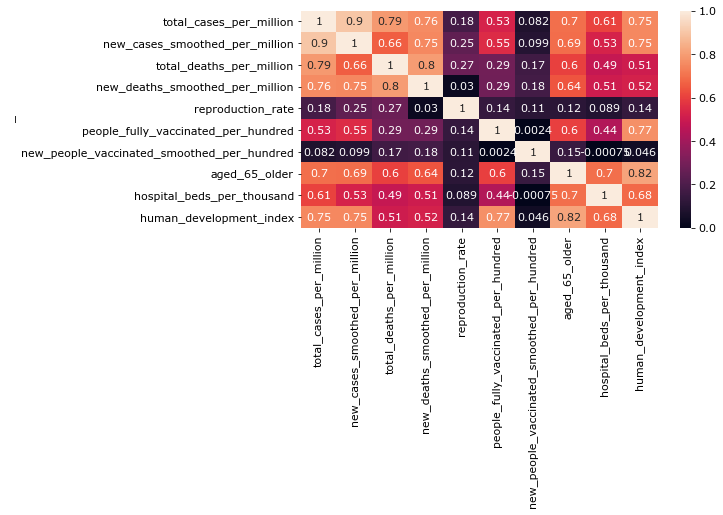

In [45]:
import os
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats

fig, ax = plt.subplots(figsize=(8,4))

rho, pval = stats.spearmanr(master_data_clean, nan_policy='omit')
rho_d=pd.DataFrame(rho, columns=['total_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 
                              'new_deaths_smoothed_per_million', 'reproduction_rate', 'people_fully_vaccinated_per_hundred', 
                              'new_people_vaccinated_smoothed_per_hundred', 'aged_65_older', 
                              'hospital_beds_per_thousand', 'human_development_index'])
rho_d=rho_d.assign(_=['total_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 
                          'new_deaths_smoothed_per_million', 'reproduction_rate', 'people_fully_vaccinated_per_hundred', 
                          'new_people_vaccinated_smoothed_per_hundred', 'aged_65_older', 'hospital_beds_per_thousand', 
                          'human_development_index']
                         )
rho_d=rho_d[['_', 'total_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 
             'new_deaths_smoothed_per_million', 'reproduction_rate', 'people_fully_vaccinated_per_hundred', 
             'new_people_vaccinated_smoothed_per_hundred', 'aged_65_older', 'hospital_beds_per_thousand', 
             'human_development_index']]
rho_d=rho_d.set_index('_')
sn.heatmap(rho_d, annot=True, fmt='.2g', ax=ax)

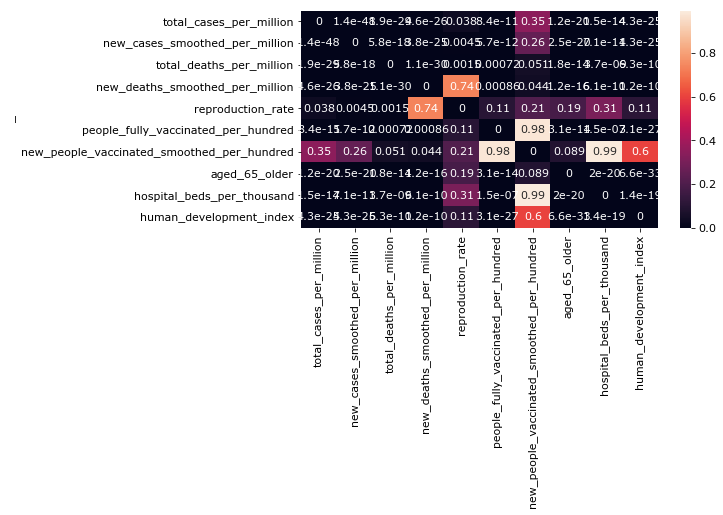

In [46]:
fig, ax = plt.subplots(figsize=(8,4))
pval_d=pd.DataFrame(pval, columns=['total_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 
                              'new_deaths_smoothed_per_million', 'reproduction_rate', 'people_fully_vaccinated_per_hundred', 
                              'new_people_vaccinated_smoothed_per_hundred', 'aged_65_older', 
                              'hospital_beds_per_thousand', 'human_development_index'])
pval_d=pval_d.assign(_=['total_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 
                          'new_deaths_smoothed_per_million', 'reproduction_rate', 'people_fully_vaccinated_per_hundred', 
                          'new_people_vaccinated_smoothed_per_hundred', 'aged_65_older', 'hospital_beds_per_thousand', 
                          'human_development_index']
                         )
pval_d=pval_d[['_', 'total_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 
             'new_deaths_smoothed_per_million', 'reproduction_rate', 'people_fully_vaccinated_per_hundred', 
             'new_people_vaccinated_smoothed_per_hundred', 'aged_65_older', 'hospital_beds_per_thousand', 
             'human_development_index']]
pval_d=pval_d.set_index('_')
sn.heatmap(pval_d, annot=True, fmt='.2g', ax=ax)

Много значимых связей - не повод для радости.

Поскольку парные коэффициенты корреляции учитывают взаимосвязи этих двух признаков со всеми прочими, необходимо исключить эти "остальные".

Для такой задачи используются частные коэффициенты корреляции.

---
A lot of significant correlations isn't a reason to celebrate.

Because pairwise correlation consists interconnections between all parameters of our dataset, I need to calculate strict correlations between two parameters, all other interconnections cleaned.

Partial correlations is created for this task.

In [13]:
"God bless stackoverflow for partial correlation function and all other helpful materials!"

from scipy import linalg
def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling
    for the remaining variables in C.
    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """
    C = np.asarray(C)
    p = C.shape[1]
    P_vals = np.zeros((p, p), dtype=float)
    P_corr = np.zeros((p, p), dtype=float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]
            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            corr, pval = stats.spearmanr(res_i, res_j)
            P_corr[i, j] = corr
            P_corr[j, i] = corr
            P_vals[i, j] = pval
            P_vals[j, i] = pval
    return P_corr, P_vals

C:\Users\spam-\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



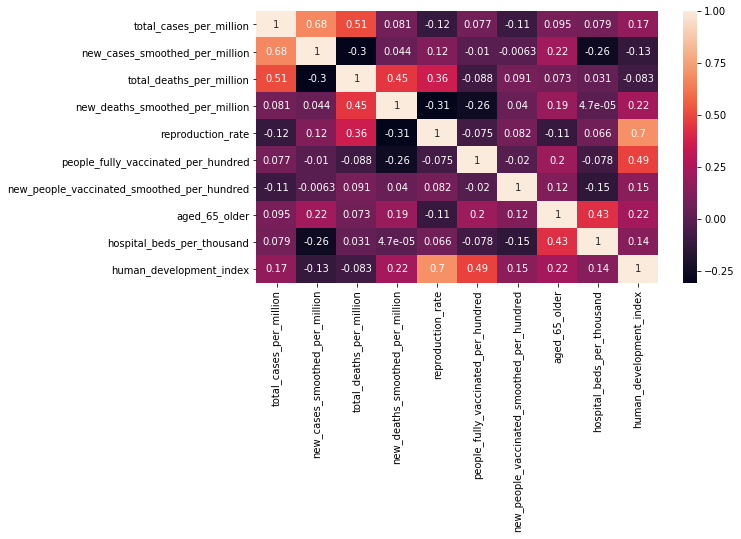

In [14]:
fig, ax = plt.subplots(figsize=(9,5))
partial_corr_array = master_data_clean.as_matrix(columns = ['total_cases_per_million', 'new_cases_smoothed_per_million', 
                                                       'total_deaths_per_million', 'new_deaths_smoothed_per_million', 
                                                       'reproduction_rate', 'people_fully_vaccinated_per_hundred', 
                                                       'new_people_vaccinated_smoothed_per_hundred',
                                                       'aged_65_older', 'hospital_beds_per_thousand', 
                                                       'human_development_index'])
# Calculate the partial correlation coefficients
pcorrs, pvals=partial_corr(partial_corr_array)
pcorr=pd.DataFrame(pcorrs, columns=['total_cases_per_million', 'new_cases_smoothed_per_million', 
                                                       'total_deaths_per_million', 'new_deaths_smoothed_per_million', 
                                                       'reproduction_rate', 'people_fully_vaccinated_per_hundred', 
                                                       'new_people_vaccinated_smoothed_per_hundred',
                                                       'aged_65_older', 'hospital_beds_per_thousand', 
                                                       'human_development_index'])

as_list = ['total_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 
           'new_deaths_smoothed_per_million', 'reproduction_rate', 'people_fully_vaccinated_per_hundred', 
           'new_people_vaccinated_smoothed_per_hundred', 'aged_65_older', 'hospital_beds_per_thousand', 
           'human_development_index']
pcorr.index = as_list
sn.heatmap(pcorr, annot=True, fmt='.2g', ax=ax)

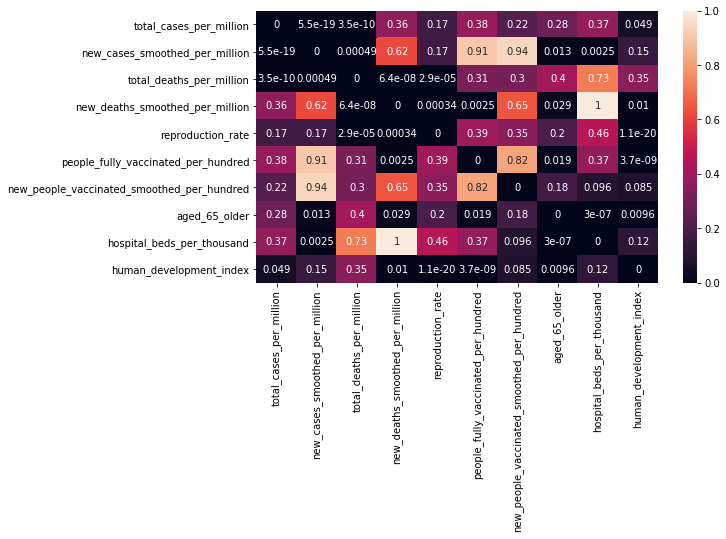

In [15]:
fig, ax = plt.subplots(figsize=(9,5))
pval=pd.DataFrame(pvals, columns=['total_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 
                                  'new_deaths_smoothed_per_million', 'reproduction_rate', 'people_fully_vaccinated_per_hundred', 
                                  'new_people_vaccinated_smoothed_per_hundred', 'aged_65_older', 
                                  'hospital_beds_per_thousand', 'human_development_index'])
pval.index = as_list
sn.heatmap(pval, annot=True, fmt='.2g', ax=ax)

Далее я соберу похожие между собой объекты в однородные группы.
Это можно сделать с помощью методов кластерного анализа.

По принадлежности к той или иной группе можно будет сделать выводы, как дела с ковидной динамикой в той или иной стране. 

Перед применением методов кластерного анализа сначала нужно привести все показатели примерно к одному масштабу. Иначе на кластеризацию будет влиять только признак с бОльшим абсолютным разбросом значений показателя. 
Например, если мы проведём кластеризацию только по доле вакцинированного населения и числу выявленных случаев заболеваний на 100 000 населения за последние 7 дней, первый показатель практически не будет влиять на кластеризацию.

Для этой цели используются процедуры центрирования (вычитания среднего арифметического) и нормирования (деления на среднеквадратическое отклонение). В 99,7% случаев значения преобразованного таким способом признака не выйдут за пределы интервала [-3; +3]. Если речь, конечно, идёт о нормально распределённой совокупности.

Так как количество доступных вакцин не влияет на ключевые показатели, выпилим его из кластеризации.

Внезапно, при дропе строк индексы не перенумеровываются, то в дальнейшем может доставить проблем с циклами. Поэтому переназначим индексы перед дальнейшими манипуляциями с массивом данных.

---

Next step - gather together similar objects into homogeneous groups. It can be done via cluster analysis methods.

Looking into the group which this object belongs to, I can say how's COVID dynamic is going there.

Before implementing of cluster analysis methods I need to fit all parameters' values to the similar scales. In other case overall clusterization will be dependent from parameter with most absolute min-max difference. 
For example, if I will make a clusterization for two parameters "cases_7d_per100k" and "cases_total_per100k", first parameters won't have any influence on clusterization result.

For this purpose I will use standardization procedure. This means that standardizated values of parameters in 99,7% cases will fit into [-3; +3] interval. Of course, if we talk about normal distributed parameter.

Number of available vaccines have no influence of COVID-related values. Let's drop it from further analysis.

Suddenly I've found - "drop string" procedure doesn't renumerate indexes. It will lead to the trouble if I'll want to cycle something. Let's renumerate indexes before further dataset analysis.

In [47]:
master_data_clean1=master_data1.dropna(axis=0, how='any', inplace=False)
master_data_clean1=master_data_clean1.drop(['last_updated_date'], axis=1)

master_dat_norm=pd.DataFrame()
i=0
for col in master_data_clean1.columns:
    if i>=2:
        master_dat_norm[col]=(master_data_clean1[col]-master_data_clean1[col].mean())/master_data_clean1[col].std()
    else:
        master_dat_norm[col]=master_data_clean1[col]
    i+=1
master_dat_norm.reset_index(level=0, inplace=True)
master_dat_norm=master_dat_norm.drop('index', 1) 
master_dat_norm.to_excel('COVID_countries_standartized_v2.xlsx')

In [17]:
import scipy.cluster.hierarchy
import pylab
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

Самое сложное в процедурах кластерного анализа - понять, на какое число классов нужно разбить совокупность.
Прикинуть это число можно с помощью процедур иерархического кластерого анализа.

Смотреть итог иерархической кластеризации в чуть более читабельном виде с видимыми названиями стран: https://github.com/Dimidro/COVID_research/blob/main/hier_covid_clust.png


----

The most difficult in clusterization process - to understand how many groups will be optimal.
It can be estimated via hierarchical cluster analysis procedures.

You can see output of this clusterization here: https://github.com/Dimidro/COVID_research/blob/main/hier_covid_clust.png

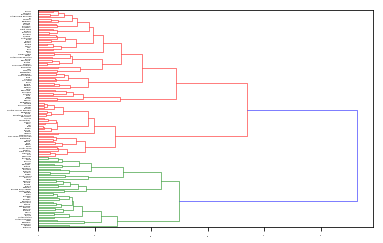

In [18]:
master_dat_norm_cl=master_dat_norm.drop(['continent', 'location'], 1) 
    
plt.rcParams['font.family']='Verdana'
plt.rcParams['font.size']=1.5
plt.rcParams['lines.linewidth']=0.5
Y = pdist(master_dat_norm_cl) 
Z = scipy.cluster.hierarchy.linkage(Y, method='ward')
scipy.cluster.hierarchy.dendrogram(Z, orientation='right', count_sort=True, distance_sort=True, labels=np.array(master_dat_norm['location']), leaf_font_size = 2)
plt.savefig('hier_covid_clust_v2.png', format='png', dpi=450)
plt.show()

Оптимальным будет то число классов, при котором расстояние между ними увеличивается больше всего.

---

Optimal number of classes is one, which returns the most distanced classes.

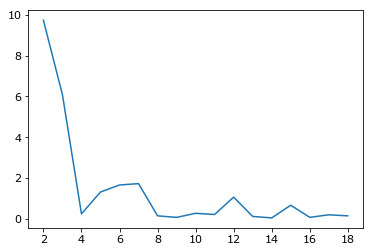

In [19]:
plt.rcParams['font.size']=11
plt.rcParams['lines.linewidth']=1.5
dist=list()
for mass in Z:
    dist.append(mass[2])
dist_ch=list()
clust_count=list()
for i in range (len(master_dat_norm_cl)-18,len(master_dat_norm_cl)-1):
    dist_ch.append((dist[i]-dist[i-1]))
    clust_count.append(len(master_dat_norm_cl)-i)
plt.plot(clust_count, dist_ch)
plt.show()

Выбор между 6 и 7 классами. Остановимся на 7, так как в нём наибольшее расстояние между классами.

---

We can choose between 6 and 7 clusters.
Let's choose 7, because we have maximum distance here.

In [20]:
clustered=scipy.cluster.vq.kmeans2(master_dat_norm_cl, 7, iter=100, minit='points')

А теперь подтянем к номерам классов названия стран.

---

Now let's join countries' names to the group numbers.

In [21]:
i=0
countries=list()
vsp=list()
for country in clustered[1]:
    vsp=[country, master_dat_norm.loc[i,'location']]
    countries.append(vsp)
    i+=1

Рассчитаем центры классов в нашем признаковом пространстве. Это позволит нам характеризовать как сами классы, так и входящие в них объекты.

------

Let's calculate clusters centers' coordinates of our dataset. This will help to describe classes and countries inside them.

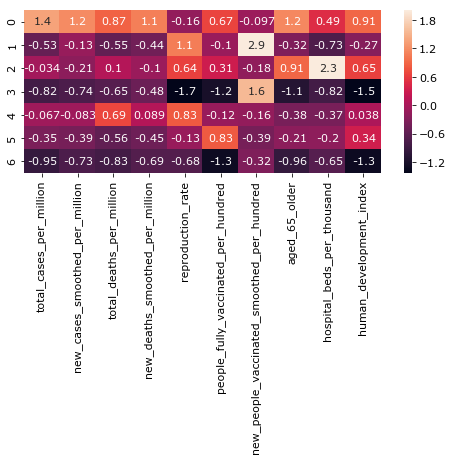

In [22]:
pd.set_option('display.max_rows', 25)
fig, ax = plt.subplots(figsize=(8,3))
clustered_float=list([])
for elem in clustered[0]:
    clustered_float.append(elem)

country_cols=list([])
country_cols.append('cluster')
country_cols.append('location')

exported_clusters=pd.DataFrame(clustered_float, columns=master_dat_norm_cl.columns)
clustered_countries=pd.DataFrame(countries, columns=country_cols)


exported_clusters.to_excel('COVID_clusters_param_v2.xlsx')
clustered_countries.to_excel('COVID_clustered_countries_v2.xlsx')

sn.heatmap(exported_clusters, annot=True, fmt='.2g', robust=True, ax=ax)

Для полной характеристики кластеров нам нужно понимать и однородность стран по характеристикам. В этом нам поможет оценка среднеквадратического отклонения.

--------

In order to make a better clusters' description we need to understand homogenuity of objects by parameters' values. I will use standard deviation.

In [23]:
clusters_normed={} 
for i in range(exported_clusters.shape[0]):
    clusters_normed[i]=clustered_countries.loc[clustered_countries.cluster==i].merge(master_dat_norm, how='left', on='location')

In [24]:
clusters_normed_stds=pd.DataFrame()

for i in range(exported_clusters.shape[0]):
    tempo=pd.DataFrame()
    tempo=clusters_normed[i].std()
    clusters_normed_stds = clusters_normed_stds.append(tempo, ignore_index=True)

clusters_normed_stds=clusters_normed_stds[['total_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 
                                  'new_deaths_smoothed_per_million', 'reproduction_rate', 'people_fully_vaccinated_per_hundred', 
                                  'new_people_vaccinated_smoothed_per_hundred', 'aged_65_older', 
                                  'hospital_beds_per_thousand', 'human_development_index']]

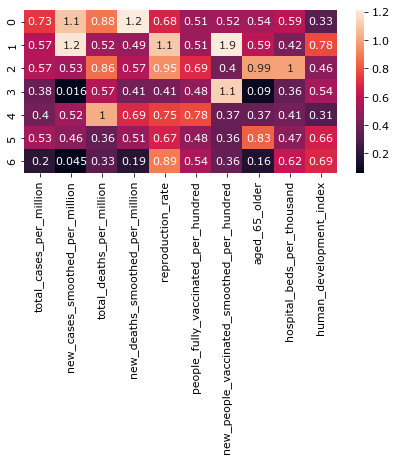

In [25]:
fig, ax = plt.subplots(figsize=(7,3))
sn.heatmap(clusters_normed_stds, annot=True, fmt='.2g', robust=True, ax=ax)

Используя центрировано-нормированные координаты центров классов, можем характеризовать ситуацию в них относительно "средней температуры по больнице" и друг друга.

---

Using standardized coordinates of clusters' centers, I can describe situation in this cluster relative to mean value worldwide and in comparison with each other.

Для того, чтобы получить содержательно интерпретируемые значения признаков, я проверну операцию обратную той, которую делал перед кластеризацией - умножу значения центров кластеров на среднеквадратические отклонения исходных признаков и прибавлю к ним соответствующие математические ожидания.

---

To get meaningfully feature values, I will do a reverse operation to standardization - will multiply the values of the centers of the clusters by the standard deviations of the initial features and add the matching means to them.

In [26]:
master_data_values=master_data_clean1[list(master_data_clean1.columns)]

clust_pr=pd.DataFrame()
i=0
for col in exported_clusters.columns:
    clust_pr[col]=(exported_clusters[col]*master_data_values[col].std()+master_data_values[col].mean())
    i+=1
clust_pr.to_excel('COVID_clusters_param_ish_v2.xlsx')
clust_pr

total_cases_per_million  new_cases_smoothed_per_million  \
0            201739.238515                     2461.062545   
1             46672.941375                      795.230500   
2             86789.473636                      696.437000   
3             22743.037333                       28.917333   
4             84108.143682                      858.216636   
5             61405.957040                      470.770720   
6             12595.224067                       39.033633   

   total_deaths_per_million  new_deaths_smoothed_per_million  \
0               2137.526788                         4.689242   
1                556.224625                         0.900000   
2               1277.871818                         1.727818   
3                434.678667                         0.781333   
4               1936.596182                         2.204409   
5                539.126440                         0.866040   
6                242.963000                         0.279367   

   reproduction_rate  people_fully_vaccinated_per_hundred  \
0           1.234848                            67.072727   
1           1.777500                            46.882500   
2           1.584545                            57.549091   
3           0.550000                            18.073333   
4           1.665909                            46.434545   
5           1.248000                            71.067600   
6           1.003333                            15.718333   

   new_people_vaccinated_smoothed_per_hundred  aged_65_older  \
0                                    0.065000      17.131939   
1                                    0.369750       7.747875   
2                                    0.056273      15.534636   
3                                    0.233000       2.829667   
4                                    0.058409       7.351545   
5                                    0.035720       8.416520   
6                                    0.042667       3.665900   

   hospital_beds_per_thousand  human_development_index  
0                    4.252879                 0.885606  
1                    1.308750                 0.714875  
2                    8.630182                 0.848545  
3                    1.100000                 0.537000  
4                    2.169545                 0.759864  
5                    2.581600                 0.803240  
6                    1.497333                 0.563167

In [27]:
full_clustered_countries=clustered_countries.merge(master_data_clean1, how='left', on='location')
full_clustered_countries.to_excel('COVID_full_clustered_countries_v2.xlsx')

In [28]:
clusters_inital={} 
for i in range(exported_clusters.shape[0]):
    clusters_inital[i]=clustered_countries.loc[clustered_countries.cluster==i].merge(master_data_clean1, how='left', on='location')

Получены центры классов в исходных значениях признаков. Это поможет более наглядно увидеть разницу между классами.
Далее посмотрим на объекты в каждом из классов и их значения.
Полный список стран по кластерам: https://github.com/Dimidro/COVID_research/blob/main/COVID_clustered_countries.xlsx

---

The centers of the classes are obtained in the original values of the characteristics. It helps to show difference between classes more clear.
Next step - let's look through contains of each cluster.
Full list of countries by clusters: https://github.com/Dimidro/COVID_research/blob/main/COVID_clustered_countries.xlsx

In [29]:
clusters_inital[0]

cluster             location      continent  total_cases_per_million  \
0         0            Argentina  South America               163282.351   
1         0            Australia        Oceania                78430.432   
2         0              Belgium         Europe               221392.629   
3         0              Croatia         Europe               205016.492   
4         0               Cyprus         Europe               260134.709   
5         0              Czechia         Europe               247346.906   
6         0              Denmark         Europe               211968.688   
7         0              Estonia         Europe               207259.649   
8         0               France         Europe               230484.471   
9         0              Georgia           Asia               255188.424   
10        0               Greece         Europe               166188.222   
11        0              Hungary         Europe               142199.602   
..      ...                  ...            ...                      ...   
21        0             Portugal         Europe               197008.671   
22        0               Serbia         Europe               216038.106   
23        0           Seychelles         Africa               332120.109   
24        0             Slovakia         Europe               262194.075   
25        0             Slovenia         Europe               269065.191   
26        0                Spain         Europe               185621.496   
27        0               Sweden         Europe               167353.286   
28        0          Switzerland         Europe               206703.372   
29        0  Trinidad and Tobago  North America                73353.219   
30        0       United Kingdom         Europe               227899.439   
31        0        United States  North America               206248.687   
32        0              Uruguay  South America               155851.452   

    new_cases_smoothed_per_million  total_deaths_per_million  \
0                         2449.277                  2601.159   
1                         3455.648                   112.067   
2                         2801.907                  2469.496   
3                         1812.079                  3247.946   
4                         2839.748                   768.969   
5                         1204.845                  3444.153   
6                         4954.155                   608.088   
7                         1800.284                  1501.674   
8                         4747.247                  1894.278   
9                         1305.064                  3657.244   
10                        1805.022                  2148.833   
11                         905.958                  4223.097   
..                             ...                       ...   
21                        3776.948                  1909.239   
22                        2045.744                  1913.979   
23                        5517.281                  1415.428   
24                         677.984                  3197.194   
25                        3668.667                  2752.652   
26                        2767.431                  1956.072   
27                        2687.050                  1537.870   
28                        3231.536                  1439.276   
29                         454.822                  2307.297   
30                        1355.324                  2243.109   
31                        2293.663                  2576.537   
32                        2868.741                  1795.618   

    new_deaths_smoothed_per_million  reproduction_rate  \
0                             3.001               1.31   
1                             2.039               1.26   
2                             1.965               1.55   
3                             9.590               1.16   
4                             3.189               0.92   
5             

In [30]:
clusters_inital[1]

cluster    location      continent  total_cases_per_million  \
0        1     Albania         Europe                83235.118   
1        1  Bangladesh           Asia                 9875.283   
2        1     Bolivia  South America                65429.831   
3        1     Iceland         Europe               139740.016   
4        1       India           Asia                27428.251   
5        1   Indonesia           Asia                15470.764   
6        1       Nepal           Asia                29577.738   
7        1   Nicaragua  North America                 2626.530   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                         723.999                  1142.734   
1                          35.210                   169.425   
2                         759.720                  1722.058   
3                        4453.924                   119.308   
4                         194.881                   350.000   
5                           3.841                   521.751   
6                         189.395                   391.846   
7                           0.874                    32.675   

   new_deaths_smoothed_per_million  reproduction_rate  \
0                            1.492               1.56   
1                            0.056               2.30   
2                            3.308               1.43   
3                            1.937               1.38   
4                            0.273               2.04   
5                            0.022               1.61   
6                            0.091               2.62   
7                            0.021               1.28   

   people_fully_vaccinated_per_hundred  \
0                                38.66   
1                                34.68   
2                                42.33   
3                                77.40   
4                                47.91   
5                                43.81   
6                                40.87   
7                                49.40   

   new_people_vaccinated_smoothed_per_hundred  aged_65_older  \
0                                       0.296         13.188   
1                                       0.796          5.098   
2                                       0.308          6.704   
3                                       0.489         14.431   
4                                       0.209          5.989   
5                                       0.316          5.319   
6                                       0.338          5.809   
7                                       0.206          5.445   

   hospital_beds_per_thousand  human_development_index  
0                        2.89                    0.795  
1                        0.80                    0.632  
2                        1.10                    0.718  
3                        2.91                    0.949  
4                        0.53                    0.645  
5                        1.04                    0.718  
6                        0.30                    0.602  
7                        0.90                    0.660

In [31]:
clusters_inital[2]

cluster     location      continent  total_cases_per_million  \
0         2      Austria         Europe               166278.451   
1         2     Barbados  North America               128821.583   
2         2      Belarus         Europe                76193.491   
3         2      Germany         Europe                99656.914   
4         2        Japan           Asia                15674.324   
5         2   Kazakhstan           Asia                62433.831   
6         2     Mongolia           Asia               125419.535   
7         2      Romania         Europe               101680.217   
8         2       Russia         Europe                73444.236   
9         2  South Korea           Asia                13887.544   
10        2      Ukraine         Europe                91194.084   

    new_cases_smoothed_per_million  total_deaths_per_million  \
0                         1973.429                  1543.281   
1                         1863.000                   941.927   
2                          133.933                   621.210   
3                          995.053                  1386.417   
4                          210.728                   146.433   
5                          660.837                   965.414   
6                          734.736                   628.364   
7                          588.628                  3104.648   
8                          191.406                  2171.528   
9                           93.204                   126.303   
10                         215.853                  2421.065   

    new_deaths_smoothed_per_million  reproduction_rate  \
0                             1.169               1.53   
1                             1.986               1.25   
2                             1.649               1.20   
3                             2.154               1.36   
4                             0.057               2.49   
5                             0.376               2.13   
6                             0.558               1.79   
7                             2.024               1.71   
8                             4.741               1.35   
9                             0.752               1.18   
10                            3.540               1.44   

    people_fully_vaccinated_per_hundred  \
0                                 73.84   
1                                 50.80   
2                                 39.38   
3                                 72.41   
4                                 79.03   
5                                 45.50   
6                                 65.14   
7                                 41.44   
8                                 47.26   
9                                 85.13   
10                                33.11   

    new_people_vaccinated_smoothed_per_hundred  aged_65_older  \
0                                        0.050         19.202   
1                                        0.042         14.952   
2                                        0.129         14.799   
3                                        0.057         21.453   
4                                        0.012         27.049   
5                                        0.043          6.991   
6                                        0.005          4.031   
7                                        0.128         17.850   
8                                        0.072         14.178   
9                                        0.025         13.914   
10                                       0.056         16.462   

    hospital_beds_per_thousand  human_development_index  
0                        7.370                    0.922  
1                        5.800                    0.814  
2                       11.000                    0.823  
3                        8.000                    0.947  
4                       13.050                    0.919  
5                        6.700                    0.825  
6                

In [32]:
clusters_inital[3]

cluster    location continent  total_cases_per_million  \
0        3    Eswatini    Africa                57980.892   
1        3  Mozambique    Africa                 6868.380   
2        3      Uganda    Africa                 3379.840   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                          50.082                  1164.309   
1                          27.099                    66.536   
2                           9.571                    73.191   

   new_deaths_smoothed_per_million  reproduction_rate  \
0                            1.950               0.34   
1                            0.155               0.66   
2                            0.239               0.65   

   people_fully_vaccinated_per_hundred  \
0                                27.41   
1                                22.97   
2                                 3.84   

   new_people_vaccinated_smoothed_per_hundred  aged_65_older  \
0                                       0.133          3.163   
1                                       0.358          3.158   
2                                       0.208          2.168   

   hospital_beds_per_thousand  human_development_index  
0                         2.1                    0.611  
1                         0.7                    0.456  
2                         0.5                    0.544

In [33]:
clusters_inital[4]

cluster     location      continent  total_cases_per_million  \
0         4      Armenia           Asia               117484.152   
1         4      Bahamas  North America                79485.732   
2         4       Belize  North America               109022.881   
3         4       Brazil  South America               109467.804   
4         4        Chile  South America                99032.956   
5         4     Colombia  South America               109712.820   
6         4   Costa Rica  North America               122845.785   
7         4      Ecuador  South America                35190.648   
8         4      Grenada  North America                92262.089   
9         4       Guyana  South America                68226.017   
10        4         Iraq           Asia                51761.379   
11        4      Jamaica  North America                39040.015   
12        4   Kyrgyzstan           Asia                28990.335   
13        4      Lebanon           Asia               124168.304   
14        4       Mexico  North America                34509.699   
15        4         Oman           Asia                60587.635   
16        4       Panama  North America               137531.572   
17        4     Paraguay  South America                70612.237   
18        4         Peru  South America                81631.108   
19        4  Saint Lucia  North America                96913.791   
20        4     Suriname  South America               114512.046   
21        4      Tunisia         Africa                67390.156   

    new_cases_smoothed_per_million  total_deaths_per_million  \
0                           91.303                  2703.724   
1                          654.694                  1811.476   
2                         1832.836                  1508.959   
3                          468.078                  2907.215   
4                          449.406                  2052.376   
5                          595.835                  2563.832   
6                          871.367                  1446.570   
7                          555.481                  1913.634   
8                         2308.164                  1805.070   
9                         1250.112                  1401.948   
10                         100.414                   589.300   
11                         466.267                   859.268   
12                          97.805                   428.161   
13                         965.937                  1392.937   
14                         308.232                  2319.260   
15                         188.275                   789.528   
16                        2038.859                  1724.034   
17                         674.925                  2336.127   
18                        1211.125                  6107.721   
19                        1498.288                  1713.657   
20                        1676.489                  2064.894   
21                         576.874                  2165.425   

    new_deaths_smoothed_per_million  reproduction_rate  \
0                             0.529               1.52   
1                             0.720               1.33   
2                             1.411               1.64   
3                             0.991               1.84   
4                             1.048               1.83   
5                             2.530               1.32   
6                             1.112               1.57   
7                             4.257               1.11   
8                             3.792               1.67   
9                             5.965               1.74   
10                            0.146               2.52   
11                            2.354               1.59   
12                            0.259               2.04   
13                            2.195               1.29   
14                            1.478               1.68   
15                            0.137   

In [34]:
clusters_inital[5]

cluster              location      continent  total_cases_per_million  \
0         5   Antigua and Barbuda  North America                58149.664   
1         5            Azerbaijan           Asia                61444.279   
2         5               Bahrain           Asia               181536.869   
3         5                Bhutan           Asia                 4140.274   
4         5                Brunei           Asia                36205.756   
5         5              Cambodia           Asia                 7132.882   
6         5                Canada  North America                74760.941   
7         5            Cape Verde         Africa                97688.027   
8         5                 China           Asia                   72.988   
9         5                  Cuba  North America                89120.051   
10        5    Dominican Republic  North America                47254.383   
11        5                  Fiji        Oceania                67016.355   
12        5               Finland         Europe                66890.925   
13        5                  Iran           Asia                73291.778   
14        5                Kuwait           Asia               110808.393   
15        5              Malaysia           Asia                85951.496   
16        5               Morocco         Africa                28623.567   
17        5           New Zealand        Oceania                 2993.402   
18        5                Norway         Europe               101503.047   
19        5          Saudi Arabia           Asia                17903.900   
20        5             Singapore           Asia                54290.194   
21        5             Sri Lanka           Asia                27842.372   
22        5              Thailand           Asia                33638.794   
23        5                Turkey           Asia               125422.846   
24        5  United Arab Emirates           Asia                81465.743   

    new_cases_smoothed_per_million  total_deaths_per_million  \
0                          762.557                  1225.589   
1                           73.851                   836.321   
2                         1539.296                   799.636   
3                           71.804                     3.847   
4                           76.358                   221.954   
5                            1.340                   177.913   
6                          684.341                   840.130   
7                          549.665                   676.276   
8                            0.102                     3.210   
9                          293.023                   737.619   
10                         536.113                   390.187   
11                         319.289                   832.873   
12                        1689.379                   310.722   
13                          32.799                  1553.968   
14                        1092.183                   572.940   
15                          95.583                   971.162   
16                         196.551                   402.332   
17                          12.466                    10.151   
18                        2154.320                   258.342   
19                         158.421                   252.174   
20                         208.303                   154.760   
21                          31.971                   709.066   
22                         107.433                   314.321   
23                         787.329                  1002.472   
24                         294.791                   220.196   

    new_deaths_smoothed_per_million  reproduction_rate  \
0                             1.447               1.06   
1                             0.978               1.20   
2                             0.082               1.62   
3                             0.000               1.77   
4                             0.000           

In [35]:
clusters_inital[6]

cluster                  location continent  total_cases_per_million  \
0         6               Afghanistan      Asia                 3993.179   
1         6                   Algeria    Africa                 5130.778   
2         6              Burkina Faso    Africa                  949.617   
3         6                   Burundi    Africa                 3001.527   
4         6                  Cameroon    Africa                 4028.245   
5         6  Central African Republic    Africa                 2707.121   
6         6                  Djibouti    Africa                15100.823   
7         6                     Egypt    Africa                 3874.894   
8         6         Equatorial Guinea    Africa                10730.462   
9         6                  Ethiopia    Africa                 3902.051   
10        6                     Gabon    Africa                19924.707   
11        6                     Ghana    Africa                 4859.113   
..      ...                       ...       ...                      ...   
18        6                    Malawi    Africa                 4235.563   
19        6                      Mali    Africa                 1402.828   
20        6                   Myanmar      Asia                 9736.231   
21        6                     Niger    Africa                  337.116   
22        6                  Pakistan      Asia                 5976.028   
23        6     Sao Tome and Principe    Africa                25299.511   
24        6              South Africa    Africa                59368.080   
25        6                     Sudan    Africa                 1181.936   
26        6                     Timor      Asia                14782.625   
27        6                      Togo    Africa                 4252.768   
28        6                     Yemen      Asia                  342.695   
29        6                  Zimbabwe    Africa                15033.424   

    new_cases_smoothed_per_million  total_deaths_per_million  \
0                            2.005                   185.413   
1                           16.368                   144.408   
2                            3.509                    16.421   
3                           12.006                     3.101   
4                            0.000                    68.064   
5                           25.116                    21.951   
6                           84.529                   188.586   
7                           11.376                   213.297   
8                           67.690                   123.458   
9                           10.861                    60.996   
10                          62.438                   131.208   
11                           8.765                    42.544   
..                             ...                       ...   
18                          13.124                   126.783   
19                          14.439                    33.612   
20                           2.740                   352.261   
21                           1.205                    11.699   
22                          21.273                   128.961   
23                         266.062                   295.482   
24                          72.442                  1558.426   
25                          12.673                    75.485   
26                           0.638                    90.782   
27                          23.556                    31.021   
28                           1.073                    65.397   
29                          23.229                   348.923   

    new_deaths_smoothed_per_million  reproduction_rate  \
0                             0.036               1.44   
1                             0.227               1.34   
2                             0.133               0.50   
3                             0.000               0.77   
4                             0.000               0.66   
5             

Корреляции для кластеров с более чем 20 объектами.

In [61]:
for i, col in enumerate(clean_col_names):
    testing_cluster=clusters_inital[6]
    k2, p = stats.normaltest(testing_cluster[col])
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(col+": The null hypothesis can be rejected")
    else:
        print(col+": The null hypothesis cannot be rejected")

p = 4.59603e-05
total_cases_per_million: The null hypothesis can be rejected
p = 3.0075e-08
new_cases_smoothed_per_million: The null hypothesis can be rejected
p = 4.47436e-07
total_deaths_per_million: The null hypothesis can be rejected
p = 1.88939e-09
new_deaths_smoothed_per_million: The null hypothesis can be rejected
p = 0.586964
reproduction_rate: The null hypothesis cannot be rejected
p = 0.0601578
people_fully_vaccinated_per_hundred: The null hypothesis cannot be rejected
p = 0.1486
new_people_vaccinated_smoothed_per_hundred: The null hypothesis cannot be rejected
p = 0.167966
aged_65_older: The null hypothesis cannot be rejected
p = 3.12341e-06
hospital_beds_per_thousand: The null hypothesis can be rejected
p = 0.379192
human_development_index: The null hypothesis cannot be rejected


C:\Users\spam-\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



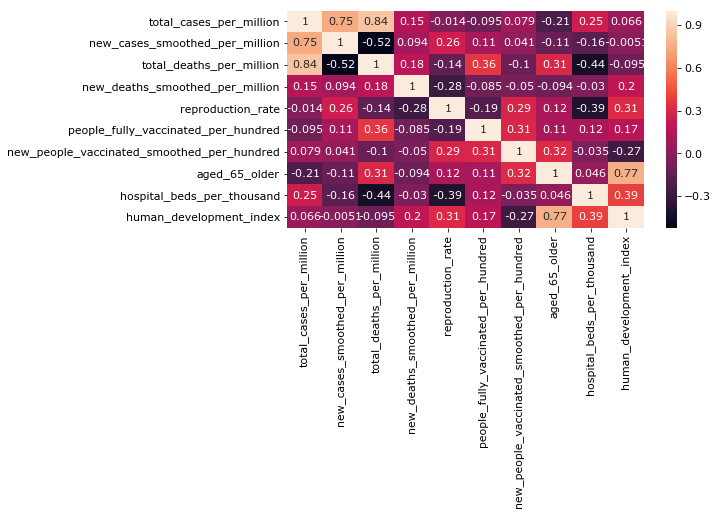

In [62]:
fig, ax = plt.subplots(figsize=(8,4))
partial_corr_array = testing_cluster.loc[:,'total_cases_per_million':'human_development_index'].as_matrix(columns = ['total_cases_per_million', 
                                   'new_cases_smoothed_per_million','total_deaths_per_million', 'new_deaths_smoothed_per_million', 
                                   'reproduction_rate', 'people_fully_vaccinated_per_hundred', 
                                   'new_people_vaccinated_smoothed_per_hundred', 'aged_65_older', 
                                   'hospital_beds_per_thousand', 'human_development_index'])
# Calculate the partial correlation coefficients
pcorrs, pvals=partial_corr(partial_corr_array)
pcorr=pd.DataFrame(pcorrs, columns=['total_cases_per_million', 'new_cases_smoothed_per_million', 
                                                       'total_deaths_per_million', 'new_deaths_smoothed_per_million', 
                                                       'reproduction_rate', 'people_fully_vaccinated_per_hundred', 
                                                       'new_people_vaccinated_smoothed_per_hundred',
                                                       'aged_65_older', 'hospital_beds_per_thousand', 
                                                        'human_development_index'])

as_list = ['total_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 
           'new_deaths_smoothed_per_million', 'reproduction_rate', 'people_fully_vaccinated_per_hundred', 
           'new_people_vaccinated_smoothed_per_hundred', 'aged_65_older', 'hospital_beds_per_thousand', 
           'human_development_index']
pcorr.index = as_list
sn.heatmap(pcorr, annot=True, fmt='.2g', ax=ax)

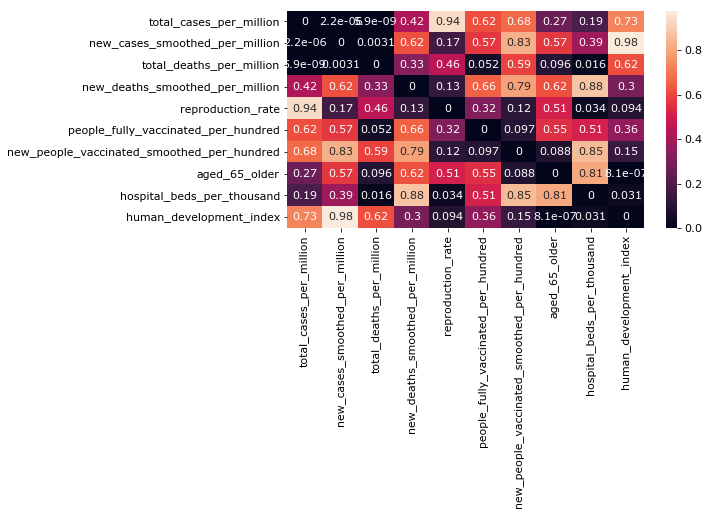

In [63]:
fig, ax = plt.subplots(figsize=(8,4))
pval=pd.DataFrame(pvals, columns=['total_cases_per_million', 'new_cases_smoothed_per_million', 
                                                       'total_deaths_per_million', 'new_deaths_smoothed_per_million', 
                                                       'reproduction_rate', 'people_fully_vaccinated_per_hundred', 
                                                       'new_people_vaccinated_smoothed_per_hundred',
                                                       'aged_65_older', 'hospital_beds_per_thousand', 
                                                       'human_development_index'])
pval.index = as_list
sn.heatmap(pval, annot=True, fmt='.2g', ax=ax)

In [59]:
plot3dfig = px.scatter_3d(testing_cluster, x='new_cases_smoothed_per_million', y='people_fully_vaccinated_per_hundred', 
                          z='new_deaths_smoothed_per_million',
              color='human_development_index')
plot3dfig.update_layout(
    title_font_family="Tahoma",
    title_font_size=9,
    scene = dict(
        xaxis = dict(range=[0, 5000],title_font_family="Tahoma",title_font_size=9,),
        yaxis = dict(range=[0, 100],title_font_family="Tahoma",title_font_size=9,),
        zaxis = dict(range=[0, 5],title_font_family="Tahoma",title_font_size=9,)
        )
    )
plot3dfig

In [40]:
from sklearn.linear_model import LinearRegression

C:\Users\spam-\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\spam-\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\spam-\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:83

Параметры, по которым строим регрессию, нормально распределены в этом кластере?

In [60]:
cluster_equation = LinearRegression()
array_x_cl1=testing_cluster.loc[:,'new_cases_smoothed_per_million':'people_fully_vaccinated_per_hundred'].as_matrix(columns = ['new_cases_smoothed_per_million', 
                                                       'people_fully_vaccinated_per_hundred'])
array_y_cl1=np.array(testing_cluster.loc[:,'new_deaths_smoothed_per_million'])
cluster_equation.fit(array_x_cl1, array_y_cl1)
cluster_equation.score(array_x_cl1, array_y_cl1)

C:\Users\spam-\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



0.14921336064872093

Как видим по данной классификации, более высокий процент вакцинированного населения может не сокращать число новых заболеваний. Но видна взаимосвязь со смертностью. Чем выше доля вакцинированных - тем ниже смертность среди заболевших. Возможно, более высокая доля вакцинированных связана и с уровнем человеческого развития жителей страны, но это должно только убеждать нас в правильности вакцинации.

Поэтому, пожалуйста, вакцинируйтесь, если Вы ещё не. Закончить этот кавардак и вернуться к нормальной жизни с путешествиями мы сможем, только минимизировав вероятность заражения ковидом и, если инфекции избежать не удалось – длительности болезни. А это сделать можно лишь при всеобщей вакцинации и ношении масок в общественных местах.

Коронавирус никуда не исчезнет и будет таким же спутником человеческой цивилизации, как грипп, корь и СПИД. Но если люди будут соблюдать разумные правила безопасности, то всё устаканится, а ковидла станет не более чем очередной сезонной инфекцией.

---

From this classification we cannot say that higher share of vaccinated population can decrease amount new cases of COVID-19. But one can see connections with amount of deaths: the more share of vaccinated - the less death-to-cases rate. It's possible that higher share of vaccinated also connected with human development index, but this should only convince us about the rightness of the "path of the vaccination".

Please, vaccinate if you're not already vaccinated. We can end this mess only after total vaccination and wearing masks in public places. After stabilization we can return to our precious life with travels and open borders.

COVID-19 won't disappear. It will become a companion of humankind, like flu, measles and AIDS. But if people will follow reasonable safety rules, take care about health - all will normalize. COVID will become no more than another seasonal illness.

# Спасибо за внимание!

-----

# Thank you for your attention!

Возможно, имеет смысл подтянуть данные по избыточной смертности, но очень мало стран с отставанием в данных менее 1 месяца.

In [42]:
pd.set_option('display.max_rows', 50)

excess_deaths_pre = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/excess_mortality/excess_mortality.csv')
excess_deaths_pre = excess_deaths_pre.drop(['p_scores_all_ages', 'p_scores_15_64', 'p_scores_65_74', 'p_scores_75_84', 
                                            'p_scores_85plus', 'deaths_2020_all_ages', 'average_deaths_2015_2019_all_ages', 
                                            'deaths_2015_all_ages', 'deaths_2016_all_ages', 'deaths_2017_all_ages', 
                                            'deaths_2018_all_ages', 'deaths_2019_all_ages', 'deaths_2010_all_ages', 
                                            'deaths_2011_all_ages', 'deaths_2012_all_ages', 'deaths_2013_all_ages', 
                                            'cum_proj_deaths_all_ages', 'cum_p_proj_all_ages', 'p_proj_all_ages', 
                                            'p_proj_0_14', 'p_proj_15_64', 'p_proj_65_74', 'p_proj_75_84', 
                                            'p_proj_85p', 'deaths_2014_all_ages', 'deaths_2021_all_ages', 
                                            'time', 'time_unit', 'p_scores_0_14',
                                            'excess_proj_all_ages', 'cum_excess_proj_all_ages'], axis=1)
excess_deaths_pre1 = excess_deaths_pre.dropna(axis=0, how='any', inplace=False)
excess_deaths = excess_deaths_pre1.sort_values(by='date').drop_duplicates(subset='location', keep='last')
excess_deaths.reset_index(level=0, inplace=True)
excess_deaths=excess_deaths.drop('index', axis=1)
excess_deaths

location        date  projected_deaths_2020_2022_all_ages  \
0       Denmark  2020-01-05                               1151.4   
1       Estonia  2020-01-05                                347.3   
2          Iran  2020-01-05                               8400.2   
3   Netherlands  2020-01-05                               3361.9   
4          Peru  2020-01-05                               2241.9   
5  South Africa  2020-01-05                              10181.9   

   cum_excess_per_million_proj_all_ages  excess_per_million_proj_all_ages  \
0                             -5.917463                         -5.917463   
1                            -40.220708                        -40.220708   
2                             -6.250826                         -6.250826   
3                            -15.075909                        -15.075909   
4                              9.085891                          9.085891   
5                              4.531828                          4.531828   

   deaths_2022_all_ages  
0                1312.0  
1                 376.0  
2                8076.9  
3                3461.0  
4                3347.0  
5               12795.0

Данные по госпитализациям и пациентам в реанимации интересные, но слишком мало стран с такими данными

In [43]:
hospitalizaions_pre = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/hospitalizations/covid-hospitalizations.csv')
hospitalizaions_pre = hospitalizaions_pre.drop('iso_code', axis=1)
hospitalizaions = hospitalizaions_pre.sort_values(by='date').drop_duplicates(subset=['entity', 'indicator'], keep='last')
hospitalizaions.reset_index(level=0, inplace=True)
hospitalizaions=hospitalizaions.drop('index', axis=1)
pd.pivot_table(hospitalizaions, values = 'value', index=['entity','date'], columns = 'indicator').reset_index()

indicator          entity        date  Daily ICU occupancy  \
0                 Algeria  2022-01-18                 37.0   
1               Argentina  2022-01-19               2310.0   
2               Australia  2022-01-20                417.0   
3                 Austria  2022-01-20                196.0   
4                 Belgium  2022-01-19                387.0   
5                Bulgaria  2022-01-16                568.0   
6                  Canada  2022-01-20               1200.0   
7                 Croatia  2022-01-09                  NaN   
8                  Cyprus  2022-01-16                 37.0   
9                 Czechia  2022-01-15                  NaN   
10                Czechia  2022-01-19                290.0   
11                Denmark  2022-01-19                  NaN   
12                Denmark  2022-01-20                 49.0   
13                Estonia  2022-01-16                 17.0   
14                Finland  2022-01-19                 64.0   
15                 France  2022-01-19               3852.0   
16                Germany  2022-01-19                  NaN   
17                Germany  2022-01-20               2447.0   
18                 Greece  2022-01-16                  NaN   
19                Hungary  2022-01-16                  NaN   
20                Iceland  2021-12-19                  NaN   
21                Iceland  2022-01-16                  NaN   
22                Ireland  2022-01-16                 88.0   
23                 Israel  2022-01-18                  NaN   
24                 Israel  2022-01-19                541.0   
..                    ...         ...                  ...   
30              Lithuania  2022-01-16                  NaN   
31             Luxembourg  2022-01-16                 20.0   
32               Malaysia  2022-01-20                160.0   
33                  Malta  2022-01-09                  NaN   
34                  Malta  2022-01-15                  3.0   
35                  Malta  2022-01-16                  NaN   
36            Netherlands  2022-01-20                289.0   
37                 Norway  2022-01-16                  NaN   
38                 Poland  2022-01-16                  NaN   
39               Portugal  2022-01-20                152.0   
40                Romania  2022-01-04                390.0   
41                 Serbia  2022-01-20                117.0   
42              Singapore  2022-01-20                  9.0   
43               Slovakia  2022-01-16                165.0   
44               Slovenia  2022-01-16                156.0   
45           South Africa  2022-01-15                  NaN   
46            South Korea  2022-01-20                488.0   
47                  Spain  2022-01-18                  NaN   
48                  Spain  2022-01-19               2204.0   
49                 Sweden  2022-01-19                120.0   
50            Switzerland  2022-01-16                  NaN   
51            Switzerland  2022-01-19                245.0   
52         United Kingdom  2022-01-16                  NaN   
53         United Kingdom  2022-01-19                675.0   
54          United States  2022-01-18              26363.0   

indicator  Daily ICU occupancy per million  Daily hospital occupancy  \
0                                    0.829                       NaN   
1                                   50.651                       NaN   
2                                   16.170                    5277.0   
3                                   21.674                     892.0   
4                                   33.269                    2568.0   
5                                   82.359                    5237.0   
6                                   31.523                   10530.0   
7                                      NaN                    1874.0   
8                                   41.294                     270.0   
9                                      NaN             

Данные по тестам - очень интересно, но есть проблема с разными метриками в разных странах (где-то считают тесты, где-то образцы, а где-то - уникальных протестированных людей) + всего около 100 стран с актуальными данными

In [44]:
testing_pre = pd.read_csv('https://github.com/owid/covid-19-data/raw/master/public/data/testing/covid-testing-latest-data-source-details.csv')
testing_pre = testing_pre.drop(['Source URL', 'Source label', 'Notes', 'Number of observations', 
                                'Cumulative total', 'Daily change in cumulative total', 
                                'Daily change in cumulative total per thousand', '7-day smoothed daily change', 
                                'Short-term tests per case', 'General source label', 'General source URL', 
                                'Detailed description'], axis=1)
testing_pre=testing_pre.sort_values(by='Date').drop_duplicates(subset='Entity', keep='last')
testing_pre.reset_index(level=0, inplace=True)
testing_pre=testing_pre.drop('index', axis=1)
testing_pre

ISO code                                         Entity        Date  \
0        OMN                           Oman - units unclear  2020-08-05   
1        CHN                        China - tests performed  2020-08-06   
2        CAN                         Canada - people tested  2021-01-31   
3        MRT                   Mauritania - tests performed  2021-04-04   
4        PNG             Papua New Guinea - tests performed  2021-04-18   
5        SLV                  El Salvador - tests performed  2021-04-22   
6        BEN                        Benin - tests performed  2021-05-19   
7        SSD                  South Sudan - tests performed  2021-05-26   
8        KAZ                   Kazakhstan - tests performed  2021-06-08   
9        ALB                      Albania - tests performed  2021-06-13   
10       LBN                      Lebanon - tests performed  2021-06-23   
11       CUB                         Cuba - tests performed  2021-07-04   
12       ATG          Antigua and Barbuda - tests performed  2021-07-13   
13       MWI                        Malawi - samples tested  2021-07-23   
14       FJI                         Fiji - tests performed  2021-07-25   
15       COD  Democratic Republic of Congo - samples tested  2021-08-20   
16       KHM                     Cambodia - tests performed  2021-09-10   
17       TTO            Trinidad and Tobago - people tested  2021-10-06   
18       TLS                        Timor - tests performed  2021-10-20   
19       DOM            Dominican Republic - samples tested  2021-10-26   
20       QAT                          Qatar - people tested  2021-10-27   
21       MDA                      Moldova - tests performed  2021-11-12   
22       KEN                         Kenya - samples tested  2021-12-17   
23       GMB                        Gambia - samples tested  2021-12-26   
24       SWE                       Sweden - tests performed  2021-12-26   
..       ...                                            ...         ...   
119      NPL                        Nepal - tests performed  2022-01-17   
120      MNG                      Mongolia - samples tested  2022-01-17   
121      NZL                  New Zealand - tests performed  2022-01-17   
122      MLT                        Malta - tests performed  2022-01-17   
123      MDV                      Maldives - samples tested  2022-01-17   
124      LVA                       Latvia - tests performed  2022-01-17   
125      ZMB                       Zambia - tests performed  2022-01-17   
126      PSE                    Palestine - tests performed  2022-01-17   
127      MMR                       Myanmar - samples tested  2022-01-17   
128      IRL                      Ireland - tests performed  2022-01-17   
129      ITA                        Italy - tests performed  2022-01-17   
130      IDN                      Indonesia - people tested  2022-01-17   
131      IND                         India - samples tested  2022-01-17   
132      ROU                      Romania - tests performed  2022-01-17   
133      HUN                      Hungary - tests performed  2022-01-17   
134      KNA          Saint Kitts and Nevis - people tested  2022-01-17   
135      GRC                        Greece - samples tested  2022-01-17   
136      GEO                      Georgia - tests performed  2022-01-17   
137      POL                         Poland - people tested  2022-01-17   
138      KWT                       Kuwait - tests performed  2022-01-17   
139      IRN                         Iran - tests performed  2022-01-19   
140      AUS                    Australia - tests performed  2022-01-19   
141      PAK                     Pakistan - tests performed  2022-01-20   
142      UKR                      Ukraine - tests performed  2022-01-20   
143      RWA                        Rwanda - samples tested  2022-01-20   

     Cumulative total per thousand  7-day smoothed daily change per thousand  \
0                      